Name: Matthew Seman

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import re
import pandas as pd

Numpy is library for scientific computing in Python. It has efficient implementation of n-dimensional array (tensor) manupulations, which is useful for machine learning applications.

In [2]:
import numpy as np

We can convert a list into numpy array (tensor)  

In [3]:
b = [[1, 2, 4], [2, 6, 9]]
a = np.array(b)
a

array([[1, 2, 4],
       [2, 6, 9]])

We can check the dimensions of the array

In [4]:
a.shape

(2, 3)

We can apply simple arithmetic operation on all element of a tensor

In [5]:
a * 3

array([[ 3,  6, 12],
       [ 6, 18, 27]])

You can transpose a tensor
    

In [6]:
print(a.T.shape)
a.T

(3, 2)


array([[1, 2],
       [2, 6],
       [4, 9]])

You can apply aggregate functions on the whole tensor

In [7]:
np.sum(a)

24

or on one dimension of it

In [8]:
np.sum(a, axis=0)

array([ 3,  8, 13])

In [9]:
np.sum(a, axis=1)

array([ 7, 17])

We can do element-wise arithmetic operation on two tensors (of the same size)

In [10]:
c1 = np.array([[1, 2, 4], [2, 6, 9]])
c2 = np.array([[2, 3, 5], [1, 2, 1]])
c1 * c2

array([[ 2,  6, 20],
       [ 2, 12,  9]])

If you want to multiply all columns of a tensor by vector (for example if you want to multiply all data features by their lables) you need a trick. This multiplication shows up in calculating the gradients. 

In [11]:
a = np.array([[1, 2, 4], [2, 6, 9]])
b = np.array([1,-1])
print(a)
print(b)


[[1 2 4]
 [2 6 9]]
[ 1 -1]


Here we want to multiply the first row of a by 1 and the second row of a by -1. Simply multiplying a by b does not work because a and b do not have the same dimension

To do this multiplication we first have to assume b has one column and then repeat the column of b with the number of columns in a. We use tile function to do that

In [12]:
b_repeat = np.tile(b,  (a.shape[1],1)).T
print(b_repeat.shape)
b_repeat

(2, 3)


array([[ 1,  1,  1],
       [-1, -1, -1]])

Now we can multiply each column of a by b:

In [13]:
a * b_repeat

array([[ 1,  2,  4],
       [-2, -6, -9]])

You can create inital random vector using numpy (using N(0,1)):

In [14]:
mu = 0 #mean
sigma = 1 #standard deviation
r = np.random.normal(mu,sigma, 1000) #draws 1000 samples from a normal distribution

We can apply functions on tensors

In [15]:
#implementation of Normal distribution
def normal(x, mu, sigma):
    return np.exp( -0.5 * ((x-mu)/sigma)**2)/np.sqrt(2.0*np.pi*sigma**2)

#probability of samples on the Normal distribution
probabilities = normal(r, mu, sigma)

Numpy has useful APIs for analysis. Here we plot the histogram of samples and also plot the probabilies to see if the samples follow the normal distribution.

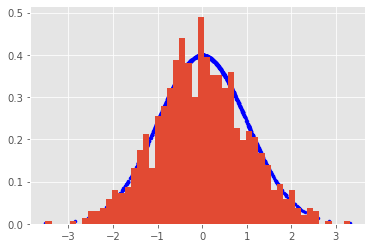

In [16]:
counts, bins = np.histogram(r,50,density=True)
plt.hist(bins[:-1], bins, weights=counts)
plt.scatter(r, probabilities, c='b', marker='.')

In [17]:
def read_data(filename):
    f = open(filename, 'r')
    p = re.compile(',')
    xdata = []
    ydata = []
    header = f.readline().strip()
    varnames = p.split(header)
    namehash = {}
    for l in f:
        li = p.split(l.strip())
        xdata.append([float(x) for x in li[:-1]])
        ydata.append(float(li[-1]))
    
    return np.array(xdata), np.array(ydata)


Assuming our data is x is available in numpy we use numpy to implement logistic regression


In [18]:
(xtrain_whole, ytrain_whole) = read_data('datasets/spambase-train.csv')
(xtest, ytest) = read_data('datasets/spambase-test.csv')

In [19]:
print("The shape of xtrain:", xtrain_whole.shape)
print("The shape of ytrain:", ytrain_whole.shape)
print("The shape of xtest:", xtest.shape)
print("The shape of ytest:", ytest.shape)

The shape of xtrain: (3601, 54)
The shape of ytrain: (3601,)
The shape of xtest: (1000, 54)
The shape of ytest: (1000,)


before training make we normalize the input data (features)

In [20]:
xmean = np.mean(xtrain_whole, axis=0)
xstd = np.std(xtrain_whole, axis=0)
xtrain_normal_whole = (xtrain_whole-xmean) / xstd
xtest_normal = (xtest-xmean) / xstd

We need to create a validation set. We create an array of indecies and permute it.

In [21]:
premute_indicies = np.random.permutation(np.arange(xtrain_whole.shape[0]))

We keep the first 2600 data points as the training data and rest as the validation data 

In [22]:
xtrain_normal = xtrain_normal_whole[premute_indicies[:2600]]
ytrain = ytrain_whole[premute_indicies[:2600]]
xval_normal = xtrain_normal_whole[premute_indicies[2600:]]
yval = ytrain_whole[premute_indicies[2600:]]

Initiallizing the weights and bias with random values from N(0,1)

In [23]:
weights = np.random.normal(0, 1, xtrain_normal.shape[1]);
bias = np.random.normal(0,1,1)

In [24]:
#the sigmoid function
def sigmoid(v):
    #return np.exp(-np.logaddexp(0, -v)) #numerically stable implementation of sigmoid function 
    return 1.0 / (1+np.exp(-v))

We can use dot-product from numpy to calculate the margin and pass it to the sigmoid function

In [25]:
#w: weight vector (numpy array of size n)
#b: numpy array of size 1
#returns p(y=1|x, w, b)
def prob(x, w, b):
    return sigmoid(np.dot(x,w) + b);

You can also calculate $l_2$ penalty using linalg library of numpy 

In [26]:
np.linalg.norm(weights)

6.900268615832312

$$\text{Cross Entropy Loss} = -\frac{1}{|D|}[\sum_{(y^i,\mathbf{x}^i)\in\mathcal{D}} 
 y^i \log p(y=1|\mathbf{x}^i;\mathbf{w},b)  +  (1-y^i) \log (1 - p(y=1|\mathbf{x}^i;\mathbf{w},b))]+\frac{\lambda}{2} \|\mathbf{w}\|^2 $$

In [27]:
#w: weight vector (numpy array of size n)
#y_prob: p(y|x, w, b)
#y_true: class variable data
#lambda_: l2 penalty coefficient
#returns the cross entropy loss
def loss(w, y_prob, y_true, lambda_):
    loss = -(1/len(y_true)) * np.sum(y_true*np.log(y_prob) + (1-y_true)*np.log(y_prob)) + (lambda_/2)*(np.linalg.norm(w) ** 2)
    return loss
    

In [28]:
#x: input variables (data of size m x n with m data point and n features)
#w: weight vector (numpy array of size n)
#y_prob: p(y|x, w, b)
#y_true: class variable data
#lambda_: l2 penalty coefficient
#returns tuple of gradient w.r.t w and w.r.t to bias

def grad_w_b(x, w, y_prob, y_true, lambda_):
    
    grad_w = np.matmul(np.transpose(y_prob-y_true), x) + lambda_ * w
    grad_b = np.mean(y_prob-y_true)
    
    return (grad_w,grad_b)

In [29]:

#lambda_ is the coeffienct of l2 norm penalty
#learning_rate is learning rate of gradient descent algorithm
#max_iter determines the maximum number of iterations if the gradients descent does not converge.
#continue the training while gradient > 0.1 or the number steps is less max_iter

#returns model as tuple of (weights,bias)

def fit(x, y_true, learning_rate, lambda_, max_iter, verbose=0):
    weights = np.random.normal(0, 1, x.shape[1]);
    bias = np.random.normal(0,1,1)
    
    i = 1
    loss_ = []
    
    #print("shape of w", weights.shape)
    #print("shape of x", x.shape)
    #print("shape of y", y_true.shape)

    #change the condition appropriately
    while i < max_iter:
        
        #Calculate loss
        y_prob = prob(x, weights, bias)
        
        loss_ = loss(weights, y_prob, y_true, lambda_)
        
        #Calculate Gradients
        (grad_w, grad_b) = grad_w_b(x, weights, y_prob, y_true, lambda_)
        
        #Update weights and bias
        weights = weights - learning_rate*grad_w
        bias = bias - learning_rate*grad_b
            
        if verbose: #verbose is used for debugging purposes
            #print iteration number, loss, l2 norm of gradients, l2 norm of weights
            print("Iteration Number: " + str(i) + " / Loss: " + str(loss_) +
                 " / Norm of grad_w, grad_b: " + str(np.linalg.norm(grad_w)) + " , " + str(np.linalg.norm(grad_b)) +
                 " / Norm of weights: " + str(np.linalg.norm(weights)))
            pass
        
        #End iterations if gradient is sufficiently small
        if np.linalg.norm(grad_w) < 0.1:
            break
        
        #increment while iteration
        i = i + 1
        
    return (weights, bias)

In [30]:
def accuracy(x, y_true, model):
    w, b = model
    return np.sum((prob(x, w, b)>0.5).astype(np.float64) == y_true)  / y_true.shape[0]

In [31]:
learning_rate = 0.001
lambda_ = 1.0

model = fit(xtrain_normal, ytrain, learning_rate, lambda_, 10000, verbose=1) #keep the verbose on here for your submissions

Iteration Number: 1 / Loss: 22.977835053872354 / Norm of grad_w, grad_b: 3635.673133474757 , 0.028071710515458162 / Norm of weights: 6.298519679327563
Iteration Number: 2 / Loss: 24.367522728623317 / Norm of grad_w, grad_b: 848.1687011496408 , 0.00243156280037814 / Norm of weights: 6.0159067616774315
Iteration Number: 3 / Loss: 22.484189570648212 / Norm of grad_w, grad_b: 654.2275131756771 , 0.014336598725986752 / Norm of weights: 5.802598925272914
Iteration Number: 4 / Loss: 21.146914461699257 / Norm of grad_w, grad_b: 510.8493712106777 , 0.024733334311956783 / Norm of weights: 5.633750981579898
Iteration Number: 5 / Loss: 20.146126996522504 / Norm of grad_w, grad_b: 403.9161727056811 , 0.028210866604158318 / Norm of weights: 5.494241601630241
Iteration Number: 6 / Loss: 19.35594145367101 / Norm of grad_w, grad_b: 335.1834905689382 , 0.026733337548448137 / Norm of weights: 5.375634374790105
Iteration Number: 7 / Loss: 18.69521552316299 / Norm of grad_w, grad_b: 281.5675403349994 , 0.0

In [32]:
print("Train accuracy: ", accuracy(xtrain_normal, ytrain, model))

Train accuracy:  0.936923076923077


In [33]:
#grid search for finding the best hyperparams and model

best_model = None
best_val = -1
for lr in [0.01, 0.001, 0.0001, 0.00001]:
    for la in [5, 2, 1, 0.1, 0.01]:
        model = fit(xtrain_normal, ytrain, lr, la, 10000, verbose=0)
        val_acc = accuracy(xval_normal, yval, model)
        print(lr, la, val_acc)
        if val_acc > best_val:
            best_val = val_acc
            best_model = model
    

0.01 5 0.8391608391608392
0.01 2 0.8551448551448552
0.01 1 0.8571428571428571
0.01 0.1 0.8861138861138861
0.01 0.01 0.8681318681318682
0.001 5 0.9200799200799201
0.001 2 0.9180819180819181
0.001 1 0.916083916083916
0.001 0.1 0.9150849150849151
0.001 0.01 0.9150849150849151
0.0001 5 0.9230769230769231
0.0001 2 0.919080919080919
0.0001 1 0.9140859140859141
0.0001 0.1 0.9170829170829171
0.0001 0.01 0.9150849150849151
1e-05 5 0.9090909090909091
1e-05 2 0.913086913086913
1e-05 1 0.9230769230769231
1e-05 0.1 0.9170829170829171
1e-05 0.01 0.9150849150849151


In [34]:
print("Test accuracy: ", accuracy(xtest_normal, ytest, best_model))

Test accuracy:  0.945
